In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [23]:
# Write a class for perceptron with fit and predict function with sigmoid activation function
class Perceptron:
  def __init__(self,learning_rate=0.1):
    self.learning_rate = learning_rate
    self._bias = 0.0
    self._weight = None
    self.misclassified_samples = []
  def fit(self, x:np.array, y:np.array,n_iter=10):
    self._b = 0.0
    self._weight = np.zeros(x.shape[1])
    self.misclassified_samples = []
    for _ in range(n_iter):
      errors = 0
      for x_i,y_i in zip(x,y):
        update = self.learning_rate * (y_i - self.predict(x_i))
        self._weight += update * x_i
        self._bias += update
        errors += int(update != 0.0)
      self.misclassified_samples.append(errors)
  def f(self, x:np.array) -> float:
    return np.dot(x, self._weight)+ self._bias
  def predict(self, x:np.array) -> int:
    return np.where(self.f(x) >= 0, 1, -1)

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


C:\Users\admin\AppData\Local\Temp\ipykernel_20476\3088351531.py:18: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',


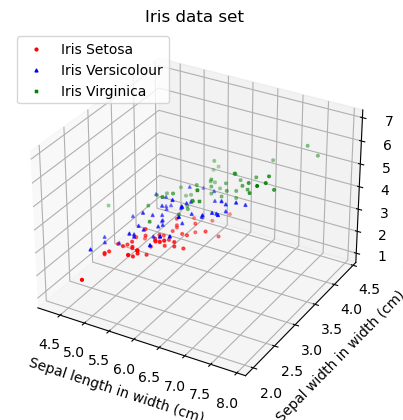

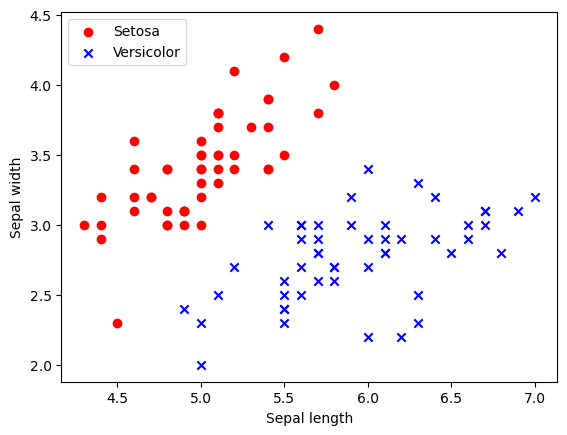

In [24]:
# Start your main here ,read the iris data set
df = pd.read_csv('IRIS.csv')
print(df.head())
# extract the label column 
y=df.iloc[:,4].values
# extract features 
x=df.iloc[:,0:3].values
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Iris data set')
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red',
         marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(x[50:100, 0], x[50:100, 1], x[50:100, 2], color='blue',
         marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(x[100:150, 0], x[100:150, 1], x[100:150, 2], color='green',
         marker='x', s=4, edgecolor='green', label="Iris Virginica")
plt.legend(loc='upper left')
plt.show()

x = x[0:100, 0:2]
y=y[0:100]
plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='Setosa')
plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='Versicolor')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='upper left')
plt.show()


In [25]:
# map the labels to a binary integer value
y = np.where(y == 'Iris-setsa', 1, -1)


In [26]:
# standardization of the input features
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()

In [27]:
# split the data

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)


In [28]:
# train the model by setting the learning rate as 0.01
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train,y_train)

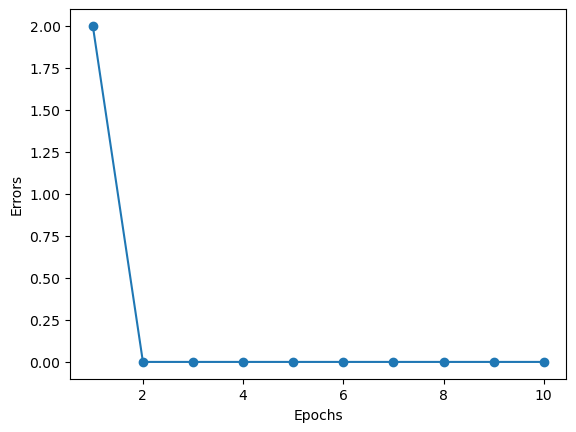

In [29]:
# plot the number of errors during each iteration
plt.plot(range(1,len(classifier.misclassified_samples)+1),classifier.misclassified_samples,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

In [30]:
# print the accuracy
print("\naccuracy : ",accuracy_score(classifier.predict(x_test),y_test)*100)


accuracy :  100.0
